<font size="6">**Iris dataset - classification**</font>

<div style="text-align: right">
<b>Maciej Kleyny</b><br>
m.kleyny@gazeta.pl<br>
</div>

## Data preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
iris = pd.read_csv('Data/Graduate - IRISES dataset (2019-06).csv', sep='|')
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


I'm going to use first 4 columns od the iris dataframe as features that will predict iris.Species which is the target (label) column.

### Renaming columns and adjusting data types

In [3]:
# renaming columns so they can be called after the dot (e.g. iris.Sepal_Length)
iris.columns = [x.replace('.', '_') for x in iris.columns]

In [4]:
# checking columns types - first four columns are expected to be numerical
iris.dtypes

Sepal_Length    float64
Sepal_Width     float64
Petal_Length    float64
Petal_Width      object
Species          object
dtype: object

In [5]:
iris['Petal_Width'] = iris['Petal_Width'].apply(lambda x: x.replace(',', '.'))

iris['Petal_Width'] = iris['Petal_Width'].astype(float)

In [6]:
iris.dtypes

Sepal_Length    float64
Sepal_Width     float64
Petal_Length    float64
Petal_Width     float64
Species          object
dtype: object

Now 4 columns are floats, but I still need to modify target column so it contains numerical labels, not words.

In [7]:
# creating a dictionary with the new numerical labels
iris_names = {'setosa': '0', 'versicolor': '1', 'virginica': '2'}

In [8]:
iris.Species = [int(x.replace(x, iris_names[x])) for x in iris.Species]
iris.dtypes

Sepal_Length    float64
Sepal_Width     float64
Petal_Length    float64
Petal_Width     float64
Species           int64
dtype: object

In [9]:
iris.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0


### Checking for null values

In [10]:
print(iris.isna().sum())
iris[iris.isna().any(axis=1)]

Sepal_Length    0
Sepal_Width     1
Petal_Length    0
Petal_Width     0
Species         0
dtype: int64


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
82,5.5,NaN,3.7,1.0,1


Iris dataset has 1 missing value. I won't fill it right now as it would lead to data leak (using whole dataset to calculate  inputed value, e.g. mean).

### Checking whether data has positive values only

In [11]:
iris.min()

Sepal_Length   -4.8
Sepal_Width     2.0
Petal_Length    1.0
Petal_Width     0.1
Species         0.0
dtype: float64

In [12]:
iris[iris.Sepal_Length<=0]

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
25,-4.8,3.4,1.9,0.2,0


We have 1 negative value. It's not supposed to happen since we're observing physical dimensions. But the value itself looks fine except for the sign so I'll replace it with a positive value.

At first it may look like a data leak, I'm searching for the negative values through the whole dataset after all. But replacing the negative value x with abs(x) doesn't use any general characteristic of the test set, it uses only the observation that's going to be modified.

In [13]:
iris.iloc[24, 0] = abs(iris.iloc[24, 0])

In [14]:
iris.iloc[24, 0]

4.8

### Train-test split

In [15]:
X = iris.iloc[:, :4]
y = iris.iloc[:, -1]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

Please note that random seed hasn't been specified.

In [17]:
pd.concat([X_train, y_train], axis=1, sort=False)

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
6,5.4,3.9,1.7,0.4,0
60,5.2,2.7,3.9,1.4,1
20,5.1,3.8,1.5,0.3,0
133,6.4,2.8,5.6,2.2,2
146,6.7,3.0,5.2,2.3,2
...,...,...,...,...,...
69,6.2,2.2,4.5,1.5,1
30,4.7,3.2,1.6,0.2,0
99,5.1,2.5,3.0,1.1,1
32,5.4,3.4,1.5,0.4,0


C:\Users\PC\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\PC\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\PC\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\PC\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


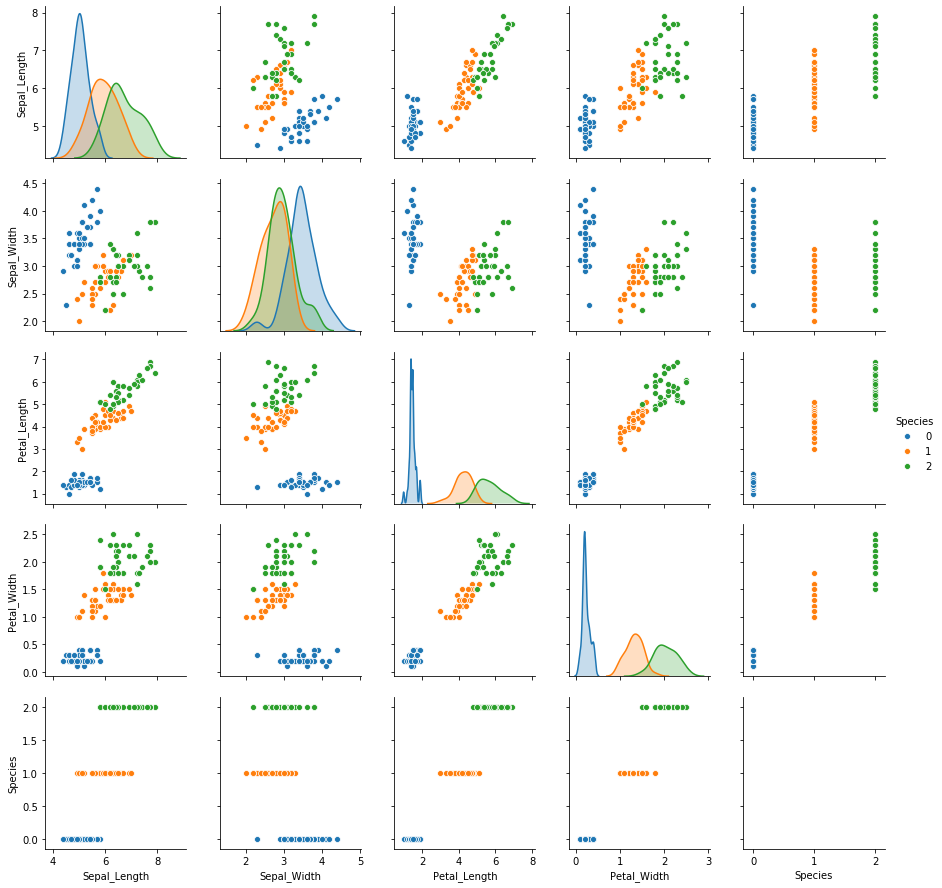

In [18]:
# plotting iris data (train set only)
sns.pairplot(pd.concat([X_train, y_train], axis=1, sort=False), hue="Species")
plt.show()

As we can see, setosa (0, blue) is pretty isolated on every scatter plot so I expect this type to be predicted with few mistakes. 2 remaining species might cause some confusion though.

Such brief conclusion can be made based on the train set that I can see while writing this. Since train_test_split is random and the whole iris set is small there is a chance that different drawing would cause different distributions.

### Balance of the classes

In [19]:
#checking whether target classes are approximately evenly large
y_train.value_counts()

0    37
1    36
2    32
Name: Species, dtype: int64

There's no imbalance, every group has a decent representation it the train set.

### Null values imputation, Box-Cox transformation and data scaling

One of the assumptions of the linear models is that the distribution of the variables should be close to normal. Box-Cox transformation will help us to achieve that.<br>
Please notice that I haven't checked the normality of the distributions (e.g. QQ plots), but Box-Cos transformation won't do any harm even if applied without the need for. 

I'd like to check whether it will help the model(s) training so I'm going to prepare 2 pipelines. First will contain:
- null values imputation, 
- Box-Cox transformation (it also contains data scaling by default, i.e. mean = 0 and standard deviation = 1, feature wise).

The other one will contain:
- null values imputation,
- data scaling.

In [20]:
# preparing steps for the 1st pipeline
steps1 = [('imputer', SimpleImputer(strategy='mean')),
         ('Box_Cox', PowerTransformer())]

In [21]:
pipeline1 = Pipeline(steps1)

In [22]:
X_train_transf_BC = pd.DataFrame(pipeline1.fit_transform(X_train), columns = X_train.columns, index = X_train.index)
X_train_transf_BC.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
6,-0.494645,1.659214,-1.120125,-0.990716
60,-0.774210,-0.778262,0.133355,0.358139
20,-0.920033,1.476087,-1.239696,-1.139153
133,0.701022,-0.552094,1.048806,1.318274
146,1.005904,-0.114033,0.836550,1.433016


In [23]:
X_test_transf_BC = pd.DataFrame(pipeline1.transform(X_test), columns = X_train.columns, index = X_test.index)
X_test_transf_BC.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
31,-1.383954,0.098292,-1.179758,-1.290977
144,1.102929,0.306408,1.206879,1.433016
39,-2.072600,-0.114033,-1.360540,-1.290977
128,0.373555,-0.114033,0.676169,0.848291
52,0.701022,0.306408,0.460632,0.482786


I want to keep the original index, just in case.

In [24]:
# preparing steps for the 2nd pipeline
steps2 = [('imputer', SimpleImputer(strategy='mean')),
         ('scaler', StandardScaler())]

In [25]:
pipeline2 = Pipeline(steps2)

In [26]:
X_train_transf = pd.DataFrame(pipeline2.fit_transform(X_train), columns = X_train.columns, index = X_train.index)
X_train_transf.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
6,-0.559917,1.739255,-1.120585,-1.000413
60,-0.797458,-0.793522,0.107963,0.314272
20,-0.916229,1.528190,-1.232271,-1.131882
133,0.627786,-0.582458,1.057296,1.366021
146,0.984097,-0.160328,0.833924,1.497489


In [27]:
X_test_transf = pd.DataFrame(pipeline2.transform(X_test), columns = X_test.columns, index = X_test.index)
X_test_transf.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
31,-1.272540,0.050737,-1.176428,-1.263350
144,1.102868,0.261801,1.224826,1.497489
39,-1.747621,-0.160328,-1.343958,-1.263350
128,0.271475,-0.160328,0.666395,0.840147
52,0.627786,0.261801,0.443022,0.445741


In [28]:
# Just to make sure the transformation was correct
display(X_train.describe()[1:3].round(2))
display(X_train_transf_BC.describe()[1:3].round(2))
display(X_train_transf.describe()[1:3].round(2))

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
mean,5.87,3.08,3.71,1.16
std,0.85,0.48,1.80,0.76


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
mean,0.0,0.0,-0.0,-0.0
std,1.0,1.0,1.0,1.0


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
mean,-0.0,0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0


## Modelling

I'm going to use a few models to see which one can do best (on the train set). I also have 2 datasets (X_train_transf_BC and X_train_transf) so I'll run my models on both, choose 1 that gives better results and check results on the test set.

### Defining evaluation function

In [29]:
# Printing some statistics to evaluate the models performance
def evaluate(y_true, y_pred):
      
    print ('''Accuracy:
    ''',
    accuracy_score(y_true,y_pred)*100)
    
    c_m = confusion_matrix(y_true, y_pred)
    ax = sns.heatmap(c_m, annot=True)
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.show()
    
    print('''
    --------------------------------------------------
    ''')

### Models training

I'll be running 4 models on 2 datasets (one with Box-Cox transformation and one without it). Then, 1 dataset will be picked based on accuracy on the training data. Next, the models accuracy will be checked on the test data.

In [30]:
# list of the models that will be checked
models_to_use = [LogisticRegression(), 
              KNeighborsClassifier(),
              GradientBoostingClassifier(),
              DecisionTreeClassifier()]

C:\Users\PC\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PC\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression
Accuracy:
     92.38095238095238


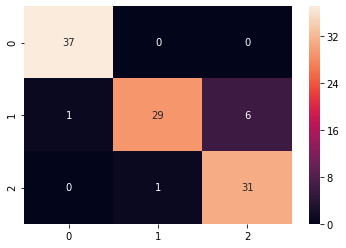


    --------------------------------------------------
    
KNeighborsClassifier
Accuracy:
     98.09523809523809


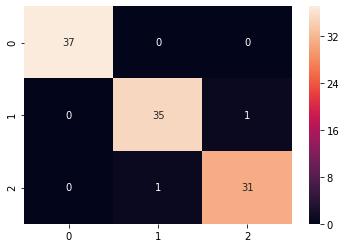


    --------------------------------------------------
    
GradientBoostingClassifier
Accuracy:
     100.0


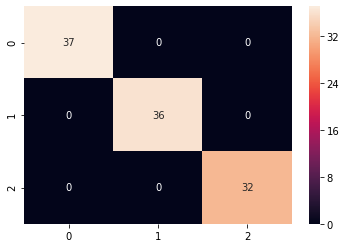


    --------------------------------------------------
    
DecisionTreeClassifier
Accuracy:
     100.0


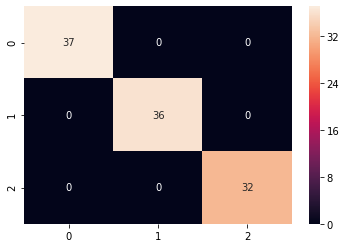


    --------------------------------------------------
    


In [31]:
transf_BC_scores = []

for model in models_to_use:
    
    model.fit(X_train_transf_BC, y_train)
    y_pred = model.predict(X_train_transf_BC)
    
    print(model.__class__.__name__)
    evaluate(y_train, y_pred)
    
    transf_BC_scores.append(accuracy_score(y_train,y_pred)*100)

LogisticRegression
Accuracy:
     93.33333333333333


C:\Users\PC\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PC\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


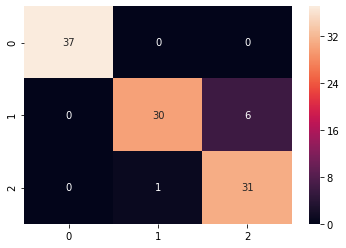


    --------------------------------------------------
    
KNeighborsClassifier
Accuracy:
     98.09523809523809


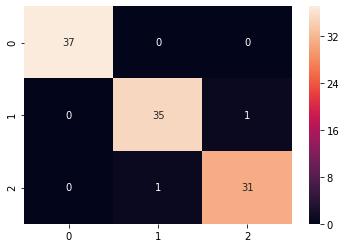


    --------------------------------------------------
    
GradientBoostingClassifier
Accuracy:
     100.0


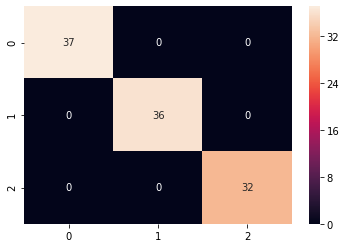


    --------------------------------------------------
    
DecisionTreeClassifier
Accuracy:
     100.0


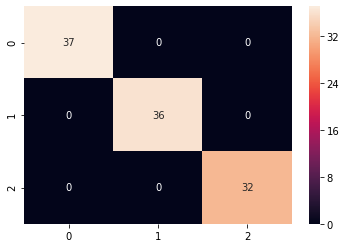


    --------------------------------------------------
    


In [32]:
transf_scores = []

for model in models_to_use:
    
    model.fit(X_train_transf, y_train)
    y_pred = model.predict(X_train_transf)
    
    print(model.__class__.__name__)
    evaluate(y_train, y_pred)    
    
    transf_scores.append(accuracy_score(y_train,y_pred)*100)

In [33]:
# average score on the training data using X_train_transf_BC
np.mean(transf_BC_scores)

97.61904761904762

In [34]:
# average score on the training data using X_train_transf
np.mean(transf_scores)

97.85714285714286

The mean of accuracies of the models is the same in both cases (please note that your results may differ as random seed in train_test_split hasn't been defined, therefore different subsets might lead to different results - my assessment is based on what I see). The scores aren't identical for every model though:

In [35]:
print('Scores using dataset with Box-Cox transformation:')

for model, score in zip(models_to_use, transf_BC_scores):
    print(model.__class__.__name__, ': ', score.round(1))
    
print('''
------------------------------------------------
''')
    
print('Scores using dataset without Box-Cox transformation:')

for model, score in zip(models_to_use, transf_scores):
    print(model.__class__.__name__, ': ', score.round(1))

Scores using dataset with Box-Cox transformation:
LogisticRegression :  92.4
KNeighborsClassifier :  98.1
GradientBoostingClassifier :  100.0
DecisionTreeClassifier :  100.0

------------------------------------------------

Scores using dataset without Box-Cox transformation:
LogisticRegression :  93.3
KNeighborsClassifier :  98.1
GradientBoostingClassifier :  100.0
DecisionTreeClassifier :  100.0


I'm going to ignore Logistic Regression as it's the worst model. Therefore I'll choose X_train_transf_BC data as it's slighly better with KNeighborsClassifier (again, it might be only a matter of dataset splitting so it might be unreproducible when you read it, but I'm trying to simulate my actual decision process here). With GradientBoostingClassifier and DecisionTreeClassifier accuracy equals 100%.

### Checking test data

Since GradientBoostingClassifier and DecisionTreeClassifier accuracy hit 100% on the train set, I would pick one of those as a recommended model. Decision trees' interpretation is easier so it would be my final choice.

With bigger dataset I would be able to make 3 subsets - train, validate and test and then rank them based not solely on train set accuracy. The current situation might cause choosing the model that's overfitted.

Let's evaluate all 3 models on the test data though.

KNeighborsClassifier
Accuracy:
     91.11111111111111


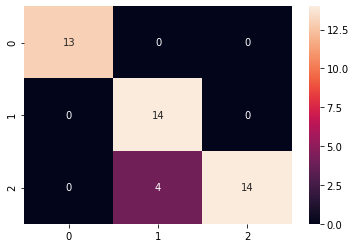


    --------------------------------------------------
    
GradientBoostingClassifier
Accuracy:
     95.55555555555556


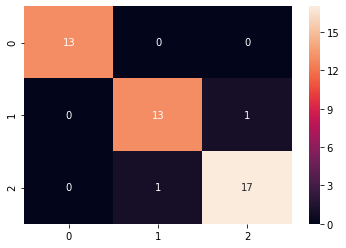


    --------------------------------------------------
    
DecisionTreeClassifier
Accuracy:
     88.88888888888889


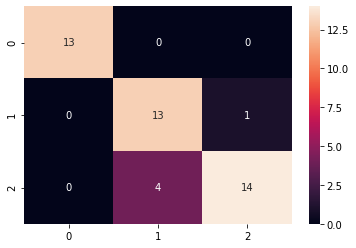


    --------------------------------------------------
    


In [36]:
for model in models_to_use[1:]:
    
    y_pred = model.predict(X_test_transf_BC)
    
    print(model.__class__.__name__)
    evaluate(y_test, y_pred)

Both GradientBoostingClassifier and DecisionTreeClassifier remain slightly better than KNeighborsClassifier, with 95.6, 95.6 and 93.3 percents of accuracy, respectively. 

As expected earlier, class 0 (setosa) was correctly predicted. Some confusion occurs between classes 1 (versicolor) and 2 (virginica), in both directions (1 predicted as 2 and 2 predicted as 1).

Your results are probably slightly different.

The analysis is finished. I'd like to make 1 more test though just to see if it improves the results.

I'll be using ensemble learning, based on 3 models from the previous section.
I know there are functions that do this for me, but I'm going to do this by hand, step by step.

### Ensemble by hand

In [37]:
proba_pred = []

for model in models_to_use[1:]:
    
    model.fit(X_train_transf_BC, y_train)
    y_pred = model.predict_proba(X_train_transf_BC)
    
    proba_pred.append(y_pred)

In [38]:
proba_pred_0 = pd.DataFrame(proba_pred[0])
proba_pred_1 = pd.DataFrame(proba_pred[1])
proba_pred_2 = pd.DataFrame(proba_pred[2])

In [39]:
ensemble_pred = pd.DataFrame(proba_pred_0.values + proba_pred_1.values + proba_pred_2.values)
ensemble_pred = (ensemble_pred.T == ensemble_pred.T.max()).T
ensemble_pred.head()

,0,1,2
0,True,False,False
1,False,True,False
2,True,False,False
3,False,False,True
4,False,False,True


In [40]:
def pick_a_label(row):
    if row == [True, False, False]:
        return 0
    if row == [False, True, False]:
        return 1
    if row == [False, False, True]:
        return 2
    # just in case there's more than 1 maximum in the above dataframe
    # (and the vector is for example [True, False, True] -
    # this is very unlikely, but probably might happen)
    # I'll add 1 more option that will be always wrong prediction,
    # but will save me from getting errors
    else:
        return -1

In [41]:
y_pred_ensemble_train = [pick_a_label(list(ensemble_pred.iloc[x])) 
                         for x in ensemble_pred.index]

Accuracy:
     100.0


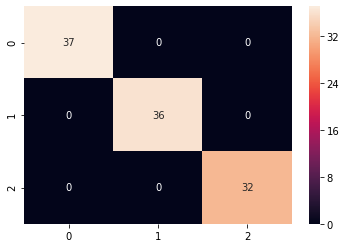


    --------------------------------------------------
    


In [42]:
# evaluating my 'ensemble by hand' function on a train set
evaluate(y_train, y_pred_ensemble_train)

In [43]:
proba_pred = []

for model in models_to_use[1:]:
    
    y_pred = model.predict_proba(X_test_transf_BC)
    
    proba_pred.append(y_pred)

In [44]:
proba_pred_0 = pd.DataFrame(proba_pred[0])
proba_pred_1 = pd.DataFrame(proba_pred[1])
proba_pred_2 = pd.DataFrame(proba_pred[2])

In [45]:
ensemble_pred = pd.DataFrame(proba_pred_0.values + proba_pred_1.values + proba_pred_2.values)
ensemble_pred = (ensemble_pred.T == ensemble_pred.T.max()).T
ensemble_pred.head()

,0,1,2
0,True,False,False
1,False,False,True
2,True,False,False
3,False,False,True
4,False,True,False


In [46]:
y_pred_ensemble_test = [pick_a_label(list(ensemble_pred.iloc[x])) 
                         for x in ensemble_pred.index]

Accuracy:
     93.33333333333333


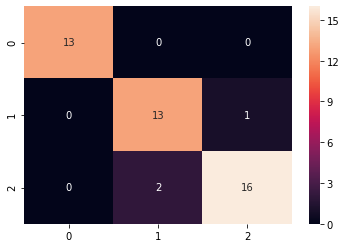


    --------------------------------------------------
    


In [47]:
# evaluating my 'ensemble by hand' function on a test set
evaluate(y_test, y_pred_ensemble_test)

## The things to be considered

There are still procedures that can be introduced to improve the score:

- all of the models used were run with the default settings - grid search might be the next step,
- since the dataset is small, cross-validation might be useful.

I don't want to make this analysis too lenghty though. I believe the accuracy scores are satisfying.<br><br>


<font size="3">**Thank you.**</font>